In [ ]:
!git

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [ ]:
import pandas as pd

circle = pd.DataFrame({"X1" : X[:,0], "X2" : X[:,1], "label" : y })

In [ ]:
circle

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


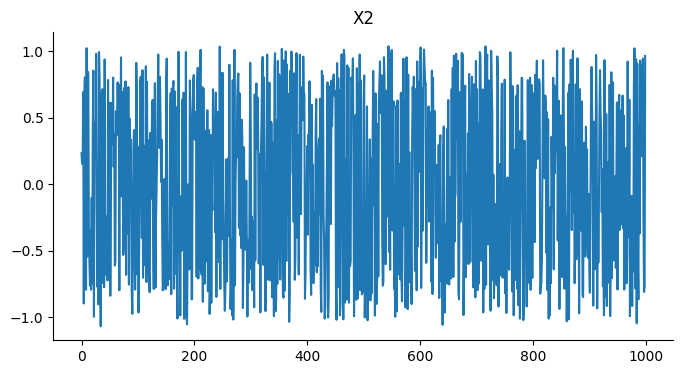

In [ ]:
# @title X2

from matplotlib import pyplot as plt
circle['X2'].plot(kind='line', figsize=(8, 4), title='X2')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
circle.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

In [ ]:
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## Building a model

In [ ]:
import torch

from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# 1. Construct a model class that subclasses nn.Module
class CircleModel_V0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create two nn.Linear layers capable of handling X and y input and output shapes
    self.layer_1 = nn.Linear(in_features = 2, out_features = 5)
    self.layer_2 = nn.Linear(in_features = 5 , out_features = 1)

    # 3. Define a forward method containing the forwrad pass computation
    def forward(self, x):
      # Return the output of layer_2, a single feature, the same shape as y
      return self.layer_2(self.layer_1(x))  # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of model and send it to target device
model_0 = CircleModel_V0().to(device)
model_0


CircleModel_V0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# Replicate the CircleModel_V0 with nn.Sequential

model_1 = nn. Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5, out_features = 1)
).to(device)

In [ ]:
untrained_preds = model_1(X_test)
print(f'Length of predictions : {len(untrained_preds)}, Shape :{untrained_preds.shape}')
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions : 200, Shape :torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[ 0.1083],
        [-0.2153],
        [ 0.6172],
        [-0.0345],
        [ 0.0785],
        [-0.1149],
        [-0.5991],
        [-0.5769],
        [ 0.6392],
        [-0.2429]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])
